In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

In [9]:
trn = pd.read_csv('aug_train.csv')
tst = pd.read_csv('aug_test.csv')
print(f"train data size: {trn.shape}, test data size: {tst.shape}")
trn.head(2)

train data size: (19158, 14), test data size: (2129, 13)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [10]:
tst.head(1)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21


### 데이터설명
빅데이터 분석이나 데이터 사이언스에 관련된 기업은 해당 기업에서 실시하는 교육 과정을 성공적으로 이수한 사람들을 데이터 사이언티스트로 채용하고 싶어합니다. 기업에서는 해당 교육생들이 교육 이수 이후 실제 회사에서 근무할지, 혹은 다른 회사를 알아볼지 알고 싶어합니다. 이 데이터의 목적은 개인의 정보를 바탕으로 이 사람이 교육 후 다른 회사를 알아볼지, 혹은 현 회사에서 근무를 원하는지를 예측하는 것입니다.
- city: 지역코드
- city_development_index: 지역 발전도(?)를 나타낸 수치(정규화)
- gender: 성별
- relevant_experience: 관련업종 경험
- enrolled_university: 대학교육 과정
- education_level: 교육수준
- major_discipline: 전공
- experience: 경력
- company_size: 현재 다니고있는 회사의 총근로자수
- lastnewjob: 현재 직장과 이전 직장의 사이의 기간(년도)
- training_houres: 교육시간

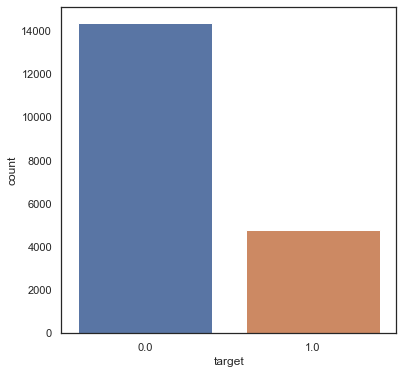

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(data=trn, x='target')
plt.show()
# 불균형 데이터 입니다.

In [22]:
trn_info = pd.concat(
    [
        trn.dtypes,
        trn.isnull().sum(),
        trn.isnull().sum() / trn.shape[0]
    ], axis=1
)
trn_info.columns=['data_types', 'Num_of_Null', 'Null_ratio']
trn_info.style.background_gradient()
# Null값이 상당히 많습니다. Null값을 대체하는게 이 데이터셋의 가장 중요한 과제중 하나일 것 같습니다.

,data_types,Num_of_Null,Null_ratio
enrollee_id,int64,0,0.000000
city,object,0,0.000000
city_development_index,float64,0,0.000000
gender,object,4508,0.235306
relevent_experience,object,0,0.000000
enrolled_university,object,386,0.020148
education_level,object,460,0.024011
major_discipline,object,2813,0.146832
experience,object,65,0.003393
company_size,object,5938,0.309949
